In [2]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h


In [4]:
def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / X.shape[1]

In [59]:
X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])

In [60]:
eps = 1e-10
alpha = 1e-3
theta = np.array([[0], [0]])



cost_old = calculate_cost(X,y,theta)
cost_new = np.inf

m = X.shape[1]



while abs(cost_old - cost_new) > eps:
    grad0 = 0
    grad1 = 0

    # for i in range(m):
    #     grad1 += (h_fun(x[i],theta) - y[i]) * x[i]

    h_y_diff = (h_fun(X, theta) - y)
    
    gradient = h_y_diff @ X.T
    theta = theta - (alpha / m) * gradient.T
    
   

    cost_old = cost_new
    cost_new = calculate_cost(X,y,theta)


print(f"Thetas:{theta}")
print(cost_new)



y_reg = h_fun(X,theta)

X_1 = X[1]
X_1.shape = (1,8)

colors = ['red' if x == 0 else 'green' for x in y[0]]
labels = {0: "Nie należy do klasy", 1: "Należy do klasy"}

plt.plot(np.array(X_1).reshape(-1), np.array(y_reg).reshape(-1))
for i in range(len(X[1])):
    plt.scatter(X[1],y,color=colors,label=labels[y[0][i]])

plt.show()


KeyboardInterrupt: 

Zad. 2

Thetas:[[-24.15253605]
 [  0.19816384]
 [  0.193308  ]]
0.20365442827269453
30.05882244669796
99.82785779692128
X.shape=(3, 100)
y.shape=(1, 100)


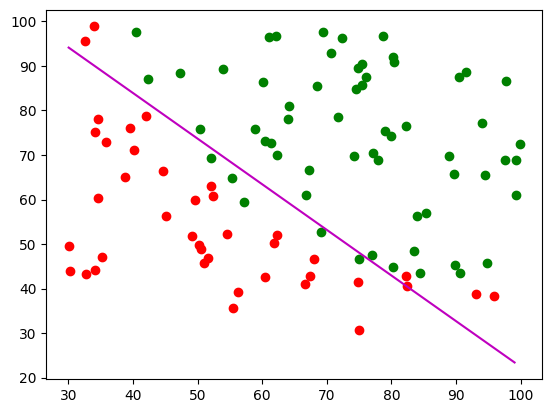

In [7]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])
 
eps = 1e-10
alpha = 1e-3
theta = np.array([[0], [0], [0]])



cost_old = calculate_cost(X,y,theta)
cost_new = np.inf

m = X.shape[1]



while abs(cost_old - cost_new) > eps:
    grad0 = 0
    grad1 = 0

    # for i in range(m):
    #     grad1 += (h_fun(x[i],theta) - y[i]) * x[i]

    h_y_diff = (h_fun(X, theta) - y)
    
    gradient = h_y_diff @ X.T
    theta = theta - (alpha / m) * gradient.T
    
   

    cost_old = cost_new
    cost_new = calculate_cost(X,y,theta)


print(f"Thetas:{theta}")
print(cost_new)

print(X[1,:].min())
print(X[1,:].max())
print(f'{X.shape=}')
print(f'{y.shape=}')

colors = ['red' if x == 0 else 'green' for x in y[0]]
labels = {0: "Nie należy do klasy", 1: "Należy do klasy"}


for i in range(len(X[0])):
    plt.scatter(X[1][i],X[2][i],color=colors[i],label=labels[X[0][i]])
x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0]*x1_db
plt.plot(x1_db, x2_db, '-m')

Zad. 3

Thetas:[[-19.32593183]
 [ 51.6601806 ]
 [ 17.85923146]
 [-34.35443066]]
0.12112936804906738
X.shape=(4, 100)
y.shape=(1, 100)
0.0
1.0


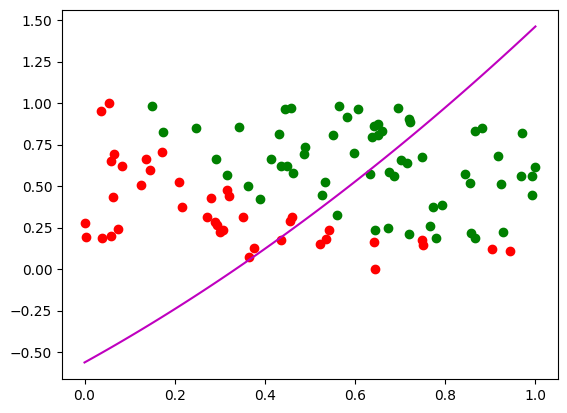

In [8]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    x2 = data[:, 1:2].T
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])




X_max = X.max(axis=1)
X_max.shape = [X_max.shape[0], 1]
X_min = X.min(axis=1)
X_min[0] = 0
X_min.shape = [X_min.shape[0], 1]
X = (X - X_min) / (X_max - X_min)


eps = 1e-9
alpha = 1e-3
theta = np.array([[0], [0], [0], [0]])



cost_old = calculate_cost(X,y,theta)
cost_new = np.inf

m = X.shape[1]



while abs(cost_old - cost_new) > eps:
    grad0 = 0
    grad1 = 0

    # for i in range(m):
    #     grad1 += (h_fun(x[i],theta) - y[i]) * x[i]

    h_y_diff = (h_fun(X, theta) - y)
    
    gradient = h_y_diff @ X.T
    theta = theta - (alpha / m) * gradient.T
    
   

    cost_old = cost_new
    cost_new = calculate_cost(X,y,theta)


print(f"Thetas:{theta}")
print(cost_new)


print(f'{X.shape=}')
print(f'{y.shape=}')

colors = ['red' if x == 0 else 'green' for x in y[0]]
labels = {0: "Nie należy do klasy", 1: "Należy do klasy"}

print(X[1,:].min())
print(X[1,:].max())


for i in range(len(X[0])):
    plt.scatter(X[1][i],X[2][i],color=colors[i],label=labels[X[0][i]])
x1_db = np.linspace(X[1, :].min(), X[1, :].max(), 100)
x2_db = -theta[0, 0]/theta[3, 0] - theta[1, 0]/theta[3, 0]*x1_db - theta[2, 0]/theta[3, 0] * x1_db ** 2 
plt.plot(x1_db, x2_db, '-m')


In [62]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
data = datasets.load_digits()
y = data['target']
x = data['data']

from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)
n = x_train.shape[1]
m = x_train.shape[0]

x_scale = np.max(x)
no_of_cls = len(np.unique(y))

In [ ]:
theta = []  # kontener na wagi kolejnych modeli
eps = 1e-5
alpha = 1e-1
for cls_id in range(no_of_cls):
    print(f'Optymalizacja dla klasy {cls_id}')
    y_cls = (y_train == cls_id).astype(np.int8)  # utworzenie macierzy y dla klasy cls_id
    y_cls.shape = [1, m]
    x_tmp = np.array(x_train) / x_scale  # skalowanie danych, wystarczy podzielić przez maksymalną jasność w zbiorze
    X_cls = np.concatenate([np.ones((1, m)), x_tmp.T])  # utworzenie macierzy X
    
    theta_cls = np.zeros((n+1, 1)) 
 
    prev_cost = calculate_cost(X_cls, y_cls, theta_cls)
    while True:
        # optymalizacja wag theta
        
        h_y_diff = (h_fun(X_cls, theta_cls) - y_cls)
    
        gradient = h_y_diff @ X_cls.T
        theta_cls = theta_cls - (alpha / m) * gradient.T


        current_cost = calculate_cost(X_cls, y_cls, theta_cls)

 
        if math.fabs(prev_cost - current_cost) < eps:
            break
        prev_cost = current_cost
    print(f'Koszt dla klasy {cls_id}: {current_cost}.')
    theta.append(theta_cls)

Optymalizacja dla klasy 0
Koszt dla klasy 0: 0.024712244879704998.
Optymalizacja dla klasy 1
Koszt dla klasy 1: 0.07999142372095482.
Optymalizacja dla klasy 2
Koszt dla klasy 2: 0.03680661913480624.
Optymalizacja dla klasy 3
Koszt dla klasy 3: 0.06412520466984338.
Optymalizacja dla klasy 4
Koszt dla klasy 4: 0.03323337159639592.
Optymalizacja dla klasy 5
Koszt dla klasy 5: 0.04559741299417798.
Optymalizacja dla klasy 6
Koszt dla klasy 6: 0.03619988723789158.
Optymalizacja dla klasy 7
Koszt dla klasy 7: 0.03922239170765806.
Optymalizacja dla klasy 8
Koszt dla klasy 8: 0.11161659590103386.
Optymalizacja dla klasy 9
Koszt dla klasy 9: 0.079634832618166.


In [68]:
y_pred = []

for x_sample in x_test:

    probabs = np.zeros(no_of_cls)
    for cls_id, theta_cls in enumerate(theta):
        x_example = np.array(x_sample) / x_scale
        X_example = np.array([1, *x_example])
        X_example = X_example[..., np.newaxis]
        probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))

    pred = np.argmax(probabs)
    y_pred.append(pred)

print(pred)

3


C:\Users\pawel\AppData\Local\Temp\ipykernel_17544\2934435121.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))


Macierz konfuzji

In [ ]:
conf_matrix = np.zeros((no_of_cls,no_of_cls))

for true_label, pred_label in zip(y_test,y_pred):
    conf_matrix[true_label,pred_label] += 1


cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Macierz konfuzji:")
for row in conf_matrix:
    print(row)




[[28  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  2]
 [ 0  1 36  0  0  0  0  1  0  0]
 [ 0  0  0 35  0  1  0  0  0  0]
 [ 1  0  0  0 40  0  0  2  1  0]
 [ 0  0  0  0  0 40  0  0  0  1]
 [ 0  1  0  0  0  0 31  0  1  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  3  1  0  0  0  0  0 27  1]
 [ 0  0  0  0  0  0  0  1  2 31]]
Macierz konfuzji:
[28.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0. 38.  0.  0.  0.  0.  0.  0.  0.  2.]
[ 0.  1. 36.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0. 35.  0.  1.  0.  0.  0.  0.]
[ 1.  0.  0.  0. 40.  0.  0.  2.  1.  0.]
[ 0.  0.  0.  0.  0. 40.  0.  0.  0.  1.]
[ 0.  1.  0.  0.  0.  0. 31.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  0. 34.  0.  0.]
[ 0.  3.  1.  0.  0.  0.  0.  0. 27.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  2. 31.]


Raport

In [79]:
raport = np.zeros((no_of_cls,3))

for i in range(no_of_cls):
    TP = conf_matrix[i][i]
    FN = 0
    FP = 0
    TN = 0
    
    # Obliczamy FN, FP i TN
    for j in range(no_of_cls):
        if i != j: 
            FP += conf_matrix[j][i]  # False Positives: inne klasy sklasyfikowane jako 'i'
            FN += conf_matrix[i][j]  # False Negatives: przypadki klasy 'i' sklasyfikowane błędnie

    
    se = TP / (TP + FN) if TP + FN != 0 else 0
    
  
    pp = TP / (TP + FP) if TP + FP != 0 else 0

   
    
    raport[i] = [i, se, pp]
print("cls | se | pp")
print(raport)

cls | se | pp
[[0.         1.         0.96551724]
 [1.         0.95       0.88372093]
 [2.         0.94736842 0.97297297]
 [3.         0.97222222 1.        ]
 [4.         0.90909091 1.        ]
 [5.         0.97560976 0.97560976]
 [6.         0.93939394 1.        ]
 [7.         1.         0.89473684]
 [8.         0.84375    0.87096774]
 [9.         0.91176471 0.88571429]]
